/home/tvg/miniconda3/envs/ml-graphs/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading sentence model...
Done!
Building datasets...
Done!
Saving processed data to cache...
Done!


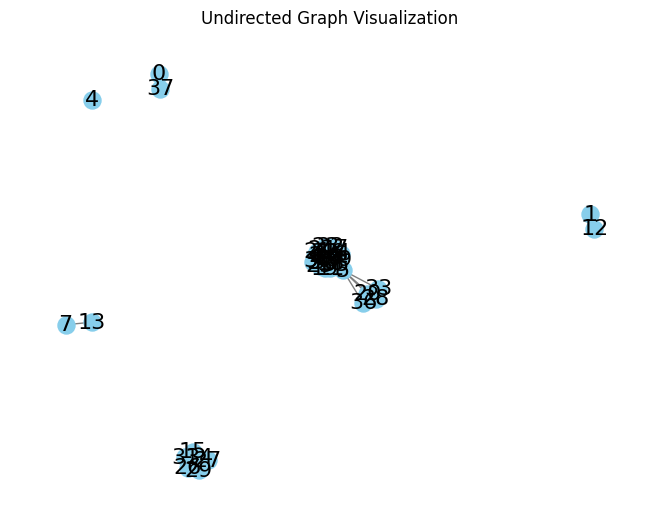

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

from dataset import OpenAlexGraphDataset

dataset_builder = OpenAlexGraphDataset(json_path="data/openalex_cs_papers.json", num_authors=40, use_cache=False)

train_graph = dataset_builder.get_train_data()
G_nx = to_networkx(train_graph, to_undirected=True)

# Draw the graph
nx.draw(G_nx, with_labels=True, node_color='skyblue', edge_color='gray', node_size=150, font_size=16)

# Show the graph
plt.title("Undirected Graph Visualization")
plt.show()

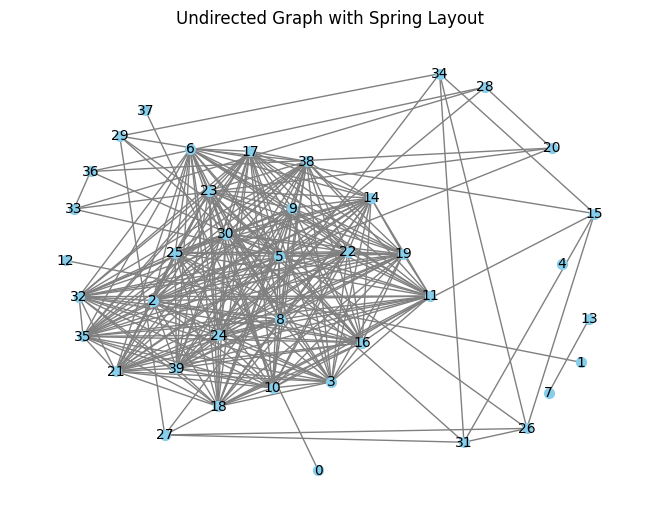

In [2]:
pos = nx.spring_layout(G_nx, k=4.0, iterations=100)

nx.draw(G_nx, pos, with_labels=True,
        node_color='skyblue', edge_color='gray',
        node_size=50, font_size=10)

plt.title("Undirected Graph with Spring Layout")
plt.show()


=== Basic Info ===
Nodes: 40
Edges: 279
Density: 0.3577
Average degree: 13.95

=== Connected Components ===
Number of connected components: 6
Largest component size: 27

=== Centrality ===
Top 5 nodes by degree centrality: [(5, 0.9615384615384616), (2, 0.8461538461538463), (8, 0.8461538461538463), (9, 0.8461538461538463), (10, 0.8461538461538463)]
Top 5 nodes by betweenness centrality: [(5, 0.27076923076923076), (2, 0.0009230769230769231), (8, 0.0009230769230769231), (9, 0.0009230769230769231), (10, 0.0009230769230769231)]

=== Clustering Coefficient ===
Average clustering coefficient: 0.8137

=== Degree Distribution ===


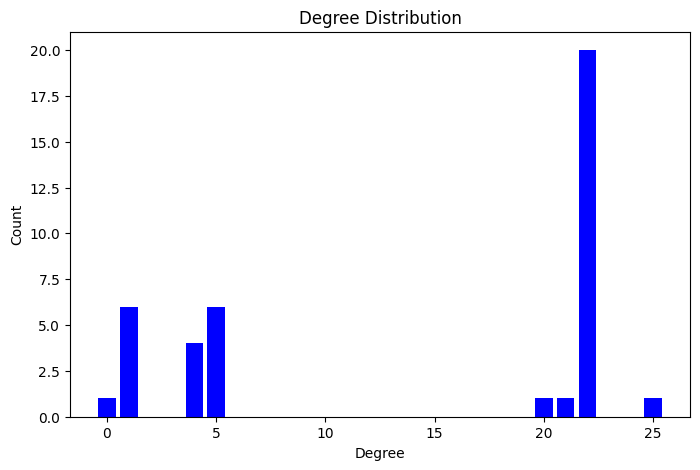

In [4]:
from collections import Counter

print("=== Basic Info ===")
print(f"Nodes: {G_nx.number_of_nodes()}")
print(f"Edges: {G_nx.number_of_edges()}")
print(f"Density: {nx.density(G_nx):.4f}")

degrees = dict(G_nx.degree())
avg_deg = sum(degrees.values()) / len(degrees)
print(f"Average degree: {avg_deg:.2f}")

print("\n=== Connected Components ===")
components = sorted(nx.connected_components(G_nx), key=len, reverse=True)
print(f"Number of connected components: {len(components)}")
print(f"Largest component size: {len(components[0])}")

G_nx_lcc = G_nx.subgraph(components[0])  # Largest Connected Component

print("\n=== Centrality ===")
deg_cent = nx.degree_centrality(G_nx_lcc)
top_deg = sorted(deg_cent.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by degree centrality:", top_deg)

btw_cent = nx.betweenness_centrality(G_nx_lcc)
top_btw = sorted(btw_cent.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by betweenness centrality:", top_btw)

print("\n=== Clustering Coefficient ===")
avg_clustering = nx.average_clustering(G_nx)
print(f"Average clustering coefficient: {avg_clustering:.4f}")

print("\n=== Degree Distribution ===")
degree_sequence = sorted([d for n, d in G_nx.degree()], reverse=True)
count = Counter(degree_sequence)
deg, cnt = zip(*count.items())

plt.figure(figsize=(8, 5))
plt.bar(deg, cnt, width=0.80, color="b")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
# plt.xscale('log')
# plt.yscale('log')
plt.show()